In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# EDA y PREPARACIÓN: HOMICIDIOS

Leemos las dos tablas dentro del excel homicidios

In [2]:
homicidios_hechos = pd.read_excel("../Datasets/homicidios.xlsx", sheet_name = "HECHOS")

In [3]:
homicidios_victimas = pd.read_excel("../Datasets/homicidios.xlsx", sheet_name = "VICTIMAS")

Hacemos un primer viztazo de los 5 datos de ambos dataframes:

In [4]:
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Notamos que en ambos casos usan la palabra SD en varias columnas para los Sin Registros en vez de nulos. Ejemplo:

In [6]:
# Ejemplo en el dataset homicidios_hechos y columna 'ACUSADO'
homicidios_hechos.loc[3,'ACUSADO']

'SD'

In [7]:
# Ejemplo en el dataset homicidios_victimas y columna 'FECHA_FALLECIMIENTO'
homicidios_victimas.loc[3,'FECHA_FALLECIMIENTO']

'SD'

También notamos que varias columnas relacionadas entre si en ambos datasets como (ID = ID_hecho), (AAAA), (MM), (DD), (FECHA) y (VICTIMA) por lo que hacemos un merge para unirlas en un nuevo dataframe y trabajar mejor con ellas a travez de las columnas (ID = ID_hecho): 

In [8]:
homicidios_final = pd.merge(homicidios_hechos, homicidios_victimas, left_on="ID", right_on="ID_hecho", how="inner", suffixes=("", "_df2"))

Borramos las columnas duplicadas y reseteamos el indice:

In [9]:
columnas_borrar = ['ID_hecho','FECHA_df2', 'AAAA_df2', 'MM_df2', 'DD_df2', 'VICTIMA_df2']
homicidios_final.drop(columns= columnas_borrar, inplace=True)

homicidios_final.reset_index(inplace = True, drop=True)

### Valores Faltantes:

Vemos la informacion general en el nuevo dataframe:

In [10]:
homicidios_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

Ahora notamos que hay en total 25 columnas con un total de 717 filas.  De este total en su mayoria parecen estar completos, salvo por el caso de las columnas 'Calle', 'Altura', 'Cruce' y 'Dirección Normalizada'. Tambien se puede notar una inconsistencia en los nombres de las columnas entre aquellas que estan todas en mayusculas y otras capitlizadas. 

Vemos la cantidad de nulos por columna y el total. Tambien hay que recalcar que varios valores de las columnas se han establecido con 'SD' (Sin dato) a aquellos valores faltantes, por lo que estos nulos que contablizemos a continuacion pueden tomar ese mismo valor de 'SD': 

In [11]:
# Nulos Calle, Pueden reemplazarse por el valor 'SD' (SIN DATO)
nulos_calle = len(homicidios_final['Calle'][homicidios_final['Calle'].isnull()])
print(f"Los nulos de la columna 'Calle' son: {nulos_calle}")

# Nulos Altura, Puede remplazarse por el valor 0
nulos_altura = len(homicidios_final['Altura'][homicidios_final['Altura'].isnull()])
print(f"Los nulos de la columna 'Altura' son: {nulos_altura}")

# Nulos Cruce, Puede reemplazarce por 'SD'
nulos_cruce = len(homicidios_final['Cruce'][homicidios_final['Cruce'].isnull()])
print(f"Los nulos de la columna 'Cruce' son: {nulos_cruce}")

# Dirrección Normalizada, Puede reemplazarse por 'SD'
nulos_dir_nor = len(homicidios_final['Dirección Normalizada'][homicidios_final['Dirección Normalizada'].isnull()])
print(f"Los nulos de la columna 'Dirección Normalizada' son: {nulos_dir_nor}")

# Total nulos
total_nulos = nulos_calle + nulos_altura + nulos_cruce + nulos_dir_nor
print(f"El total de nulos en el dataframe homicidios_final son: {total_nulos}")

Los nulos de la columna 'Calle' son: 1
Los nulos de la columna 'Altura' son: 584
Los nulos de la columna 'Cruce' son: 177
Los nulos de la columna 'Dirección Normalizada' son: 9
El total de nulos en el dataframe homicidios_final son: 771


### Tipos de variables de cada columna:

Hacemos un acercamiento mas profundo trayendo las primeras 5 filas:

        

In [12]:
homicidios_final.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


Podemos notar que las columnas tienen las siguientes tipos de variable:

+ **ID**: cualitativa-ordinal ya que esta creada por el año y otro numero ascendente  que sirve para enumerarlo en ese año.
 
+ **N_VICTIMAS**: cuantitativa-discreta ya que no se puede contabilizar las victimas en fracciones, ya que uno es o no victima.

+ **FECHA**: cualitativa-ordinal ya que son fechas de mas antigua a mas reciente dando un roden jerarquica de tiempo.

+ **AAAA**: cualitativa-ordinal ya que se basan en los años de la columna FECHA anterior.

+ **MM**: cualitativa-ordinal, son los meses de la columna 'FECHA'

+ **DD**: cualitativa-ordinal, son los dias de la columna 'FECHA'

+ **HORA**: cualitativa-ordinal, son los dias de la columna 'FECHA'

+ **HH**: cualitativa-ordinal, es lo mismo que HORA pero redondeado a entero sin contar los minutos.

+ **LUGAR_DEL_HECHO**: cualitativa-categorica, direccion del homicidio, no hay un orden de importancia en dirrecciones.

+ **TIPO_DE_CALLE**: cualitativa-categorica, si bien pueden tomarse las calles segun su tamaño teniendo jerarquia, en este caso lo tomo como categoria simplemente.

+ **Calle**: cualitativa-categorica, el nombre de las calles

+ **Altura**: cualitativa-categorica ya que si bien tienen numeros, hace referencia a la identificacion de un segmento de la calle y no un orden como tal.

+ **Cruce**: cualitativa-categorica, La interseccion de las calles del hecho

+ **Dirección Normalizada**: cualitativa-categorica, es la direcciones normalizada

+ **COMUNA**: cualitativa-categorica, si bien son numero no representan un orden de importancia una de otra sino simplemente se usa como identificador

+ **XY (CABA)**: cuantitativa-continua, porque representan medidas numericas de ubicacion, en este caso parece ser coordenadas

+ **pos x**: cuantitativa-continua, son las coordenadas de longitud.

+ **pos y**: cuantitativa-continua, son las coordenadas de latitud

+ **PARTICIPANTES**: cualitativa-categorica, son los tipo de vihiculo que participo en el accidente

+ **VICTIMA**: cualitativa-categorica, es el tipo de vehiculo de la victima

+ **ACUSADO**: cualitativa-categorica, es el tipo de vehiculos que genero el accidente

+ **ROL**: cualitativa-categorica, es el rol de la victima

+ **SEXO**: cualitativa-categorica, es el sexo de la victima

+ **EDAD**: cuantitativa-discreta, es los años de la victima

+ **FECHA_FALLECIMIENTO**: cualitativa-ordinal ya que son fechas de mas antigua a mas reciente y hacer referencia a la fecha de deceso de la victima

### Outliers: 


Obtenemos una descripcion de la columna N_VICTIMAS que pueden tener outliers:

In [13]:
homicidios_final['N_VICTIMAS'].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

Podemos notar con la descripcion que hay promedio se encuentra muy cerca del 1 por lo que la gran mayoria de los datos van a estar cerca de ese valor, esto tambien lo pordemos chequear viendo la mediana(50%), el primer cuartil(25%) y el tercer cuartil(75%) lo que ya podemos presuponer que van a ser conciderados como outliers los valores por debajo o encima del 1 al usar un boxplot o un grafico de violin.
Tambien notamos que existe una dispersion muy baja entre los datos ya que la desviacion estandar es de solo 0.257 y que existe como valor maximo el 3 y valor minimo el 1.

Identificamos la cantidad de outliers que hay con el uso de las metricas del rango intercuartilico:

In [14]:
q1 = np.quantile(homicidios_final["N_VICTIMAS"],0.25)
q3 = np.quantile(homicidios_final["N_VICTIMAS"],0.75)
iqr = q3 - q1
outliers_superiores = len(homicidios_final["N_VICTIMAS"][homicidios_final["N_VICTIMAS"] > q3])
outliers_inferiores = len(homicidios_final["N_VICTIMAS"][homicidios_final["N_VICTIMAS"] < q1])
print("Segun el rango intercuartilico podemos notar que:")
print(f"El cuartil 1 es {q1}, el cuartil 3 es {q3}, por lo tanto el rango intercuartilico es {iqr}")
print(f"Los outliers que estan por encima del margen superior son: {outliers_superiores} outliers ")
print(f"Los outliers que estan por debajo del margen inferior son: {outliers_inferiores} outliers ")

Segun el rango intercuartilico podemos notar que:
El cuartil 1 es 1.0, el cuartil 3 es 1.0, por lo tanto el rango intercuartilico es 0.0
Los outliers que estan por encima del margen superior son: 41 outliers 
Los outliers que estan por debajo del margen inferior son: 0 outliers 


Notamos que hay 41 outliers en total que son aquellos superiores al valor de 1 victima. Graficamos para comprobar con un histograma que la gran mayoria de valores es de 1:

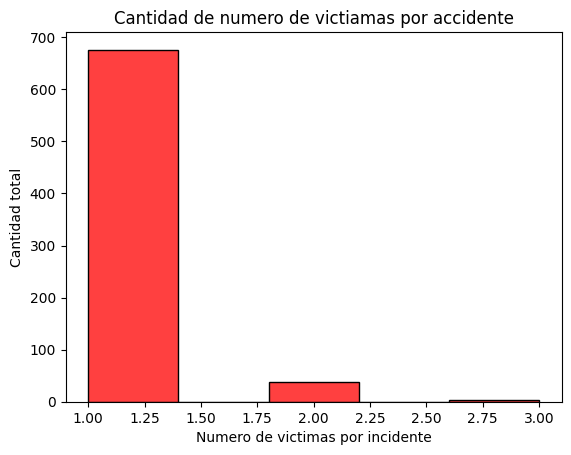

In [15]:
sns.histplot(data=homicidios_final, x='N_VICTIMAS', bins=5, kde=False, color='red')
plt.ylabel("Cantidad total")
plt.xlabel("Numero de victimas por incidente")
plt.title("Cantidad de numero de victiamas por accidente")
plt.show()

Con un primer grafico de distribucion podemos notar que la gran mayoria de las incidentes fatales tienen como consecuencia una victima, tambien podemos notar en menor media 2 victimas y finalmente 3 victimas si bien hay son poco frecuentes o casos aislados.  

Realizamos un boxplot para ver facilmente los outliers superiores a 1 que usa el rango intercuartilico:

C:\Users\patri\AppData\Local\Temp\ipykernel_10832\2605916736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='N_VICTIMAS',x='AAAA' ,data=homicidios_final, palette="Set3")


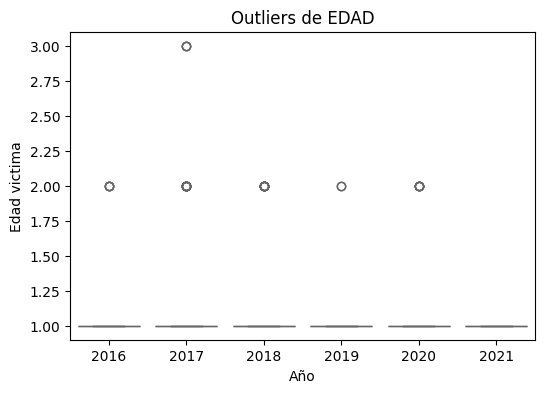

In [16]:
plt.figure(figsize=(6, 4))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='N_VICTIMAS',x='AAAA' ,data=homicidios_final, palette="Set3")
plt.title('Outliers de EDAD')
plt.ylabel('Edad victima')
plt.xlabel('Año')
plt.show()

Hacemos un grfico de violin para ver jntos tanto la distribucion y los outliers:

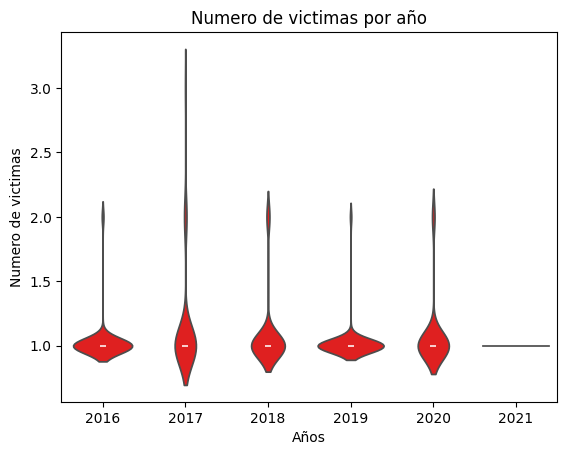

In [17]:
sns.violinplot(x='AAAA', y='N_VICTIMAS', data=homicidios_final, color="red")
plt.xlabel('Años')
plt.ylabel('Numero de victimas')
plt.title('Numero de victimas por año')
plt.show()

Con este grafico de violin y el boxplot anterior podemos notar que encontramos outliers de dos victimas todos los años menos en el 2021. Tambien se puede notar que 3 victimas se ha registtrado unicamente en el año 2017. Si bien los valores 2 y 3 son conciderados outliers o poco frecuentes si es posible que sucedan estos acontecimientos por lo que se mantendra sin modificarlo.

Ahora revisamos la columna 'EDAD' en busca de outliers, creamos una variable edadquitando los valores nulos y sin dato(SD) y lo convertimos en entero para verificar los outliers:

In [18]:
# Quitamos los SD(sin dato) y nulos, y los volvemos entero:
EDAD = pd.to_numeric(homicidios_final["EDAD"], errors='coerce')
EDAD.dropna(inplace=True)
EDAD = EDAD.astype(int)

Graficamos la densidad de los años de las victimas que si tenemos registrados:

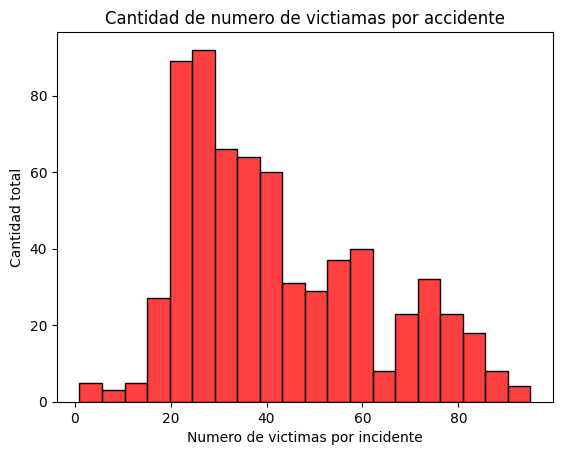

In [19]:
sns.histplot(x=EDAD, bins=20, kde=False, color='red')
plt.ylabel("Cantidad total")
plt.xlabel("Numero de victimas por incidente")
plt.title("Cantidad de numero de victiamas por accidente")
plt.show()

Hacemos un boxenplot que nos permite graficar tanto los outliers como la densidad:

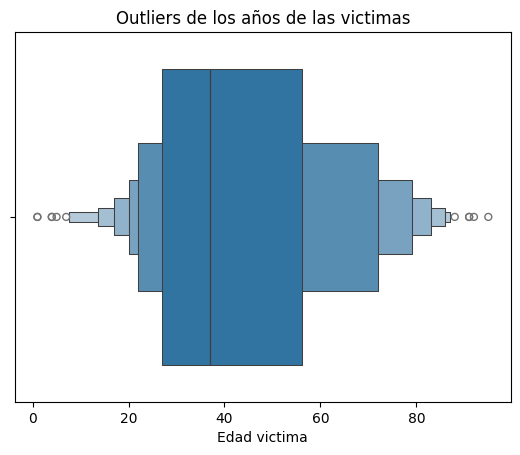

In [20]:
sns.boxenplot(x=EDAD)
plt.xlabel('Edad victima')
plt.title('Outliers de los años de las victimas')
plt.show()

Notamos que la mayoria de las edades van entre los 20 años y los 80 años.

Realizamos una descripcion de EDAD:

In [21]:
EDAD.describe()

count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64

Notamos un promedio de 42.16 años, un maximo de 95 y un minimo de 1 año. 

Usamos la regla de los 3 sigmas para encontrar valores outliers muy extremos:

In [22]:
edad_promedio = EDAD.mean()
deviacion_estandar_edad = EDAD.std()
limite_superior = edad_promedio + 3 * deviacion_estandar_edad
limite_inferior = edad_promedio - 3 * deviacion_estandar_edad

cantidad_outliers = len(EDAD[(EDAD > limite_superior) | (EDAD < limite_inferior)])

print(f"Los conciderados outliers extremos segun la regla de las 3 sigma son: {cantidad_outliers}")

Los conciderados outliers extremos segun la regla de las 3 sigma son: 0


Ahora usamos el rango intercuartilico para detectar outliers no necesariamente tan extremos:

In [23]:
q1 = np.quantile(EDAD,0.25)
q3 = np.quantile(EDAD,0.75)
iqr = q3 - q1
outliers_superiores = len(EDAD > q3)
outliers_inferiores = len(EDAD < q1)
print("Segun el rango intercuartilico podemos notar que:")
print(f"El cuartil 1 es {q1}, el cuartil 3 es {q3}, por lo tanto el rango intercuartilico es {iqr}")
print(f"Los outliers que estan por encima del margen superior son: {outliers_superiores} outliers ")
print(f"Los outliers que estan por debajo del margen inferior son: {outliers_inferiores} outliers ")

Segun el rango intercuartilico podemos notar que:
El cuartil 1 es 27.0, el cuartil 3 es 56.25, por lo tanto el rango intercuartilico es 29.25
Los outliers que estan por encima del margen superior son: 664 outliers 
Los outliers que estan por debajo del margen inferior son: 664 outliers 


Mostramos graficamente con un Boxplot los outlier, ya que usa el rango intercuartilico:

Mostramos los valores conciderados outliers segun el rango intercuartilico:

In [24]:
edades_outliers = set()
for edad in EDAD:
    if edad > q3 or edad < q1:
        edades_outliers.add(edad)
    else:
        continue
print(f"Las edades concideradas outliers: {edades_outliers}")

Las edades concideradas outliers: {1, 4, 5, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 95}


### Duplicados:

Revisamos la cantidad de duplicados que haya en las filas:

In [25]:
duplicados = homicidios_final.duplicated().sum()
print(f"la cantidad de filas duplicadas en el dataset homicidios son: {duplicados}")

la cantidad de filas duplicadas en el dataset homicidios son: 0


### Guardamos el nuevo dataframe:

In [26]:
homicidios_final.to_csv('../DATASETS/homicidios_final.csv', index=False)

### Algunas Observaciones:

In [27]:
homicidios_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

### Algunas observaciones:

Agrupamos para ver la cantidad de victimas por año y sexo:

In [28]:
sexo_victimas = homicidios_final.groupby(['AAAA', 'SEXO'])['N_VICTIMAS'].sum().reset_index()

Comprobamos el nuevo dataframe agrupado:

In [29]:
sexo_victimas

,AAAA,SEXO,N_VICTIMAS
0,2016,FEMENINO,27
1,2016,MASCULINO,117
2,2016,SD,6
3,2017,FEMENINO,38
4,2017,MASCULINO,122
5,2018,FEMENINO,41
6,2018,MASCULINO,120
7,2019,FEMENINO,27
8,2019,MASCULINO,79
9,2020,FEMENINO,18


Graficamos con un grafico de barras agrupado para ver la cantidad de victimas por año y que estas vcitimas esten divididas por sexo:

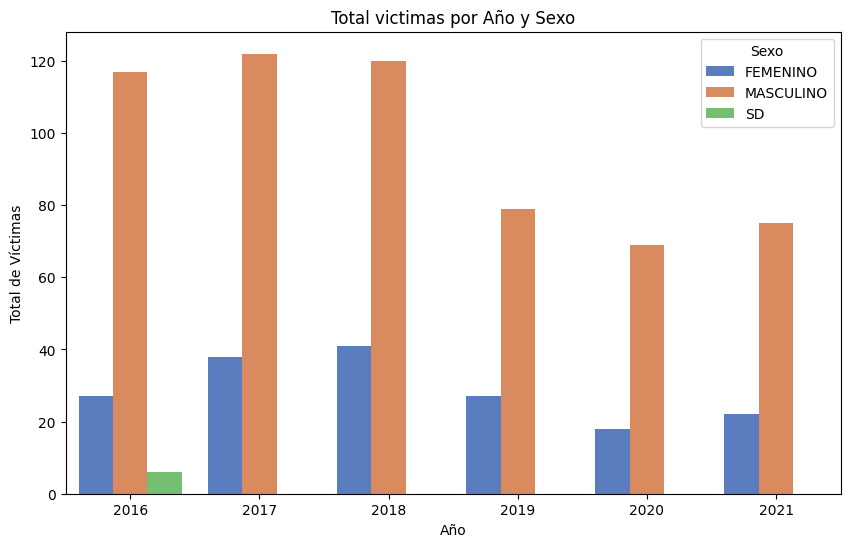

In [30]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='AAAA', y='N_VICTIMAS', hue='SEXO', data=sexo_victimas, palette='muted')
plt.xlabel('Año')
plt.ylabel('Total de Víctimas')
plt.title('Total victimas por Año y Sexo')
plt.legend(title='Sexo')
plt.show()

Podemos notar que la mayoria de victimas en los años involucrados son del sexo masculino, y tambien notamos que durante el año 2016 faltaron registrar el sexo de algunas victimas aunque menos de 10 registros. Podemos comprobar sus valores:

In [31]:
sexo_victimas.value_counts()

AAAA  SEXO       N_VICTIMAS
2016  FEMENINO   27            1
      MASCULINO  117           1
      SD         6             1
2017  FEMENINO   38            1
      MASCULINO  122           1
2018  FEMENINO   41            1
      MASCULINO  120           1
2019  FEMENINO   27            1
      MASCULINO  79            1
2020  FEMENINO   18            1
      MASCULINO  69            1
2021  FEMENINO   22            1
      MASCULINO  75            1
Name: count, dtype: int64

En total podemos contar 6 valores sin registrar en 2016. Ahora veremos el tipo de vehiculo que mas victimas han sido durante los años:

Agrupamos por la cantidad de victimas por el vihiculo de la misma:

In [32]:
tipo_victima = homicidios_final.groupby(['VICTIMA'])['N_VICTIMAS'].count().reset_index()

In [33]:
tipo_victima

,VICTIMA,N_VICTIMAS
0,AUTO,92
1,BICICLETA,29
2,CARGAS,7
3,MOTO,302
4,MOVIL,3
5,OBJETO FIJO,2
6,PASAJEROS,5
7,PEATON,266
8,PEATON_MOTO,2
9,SD,9


Graficamos con un grafico de pastel:

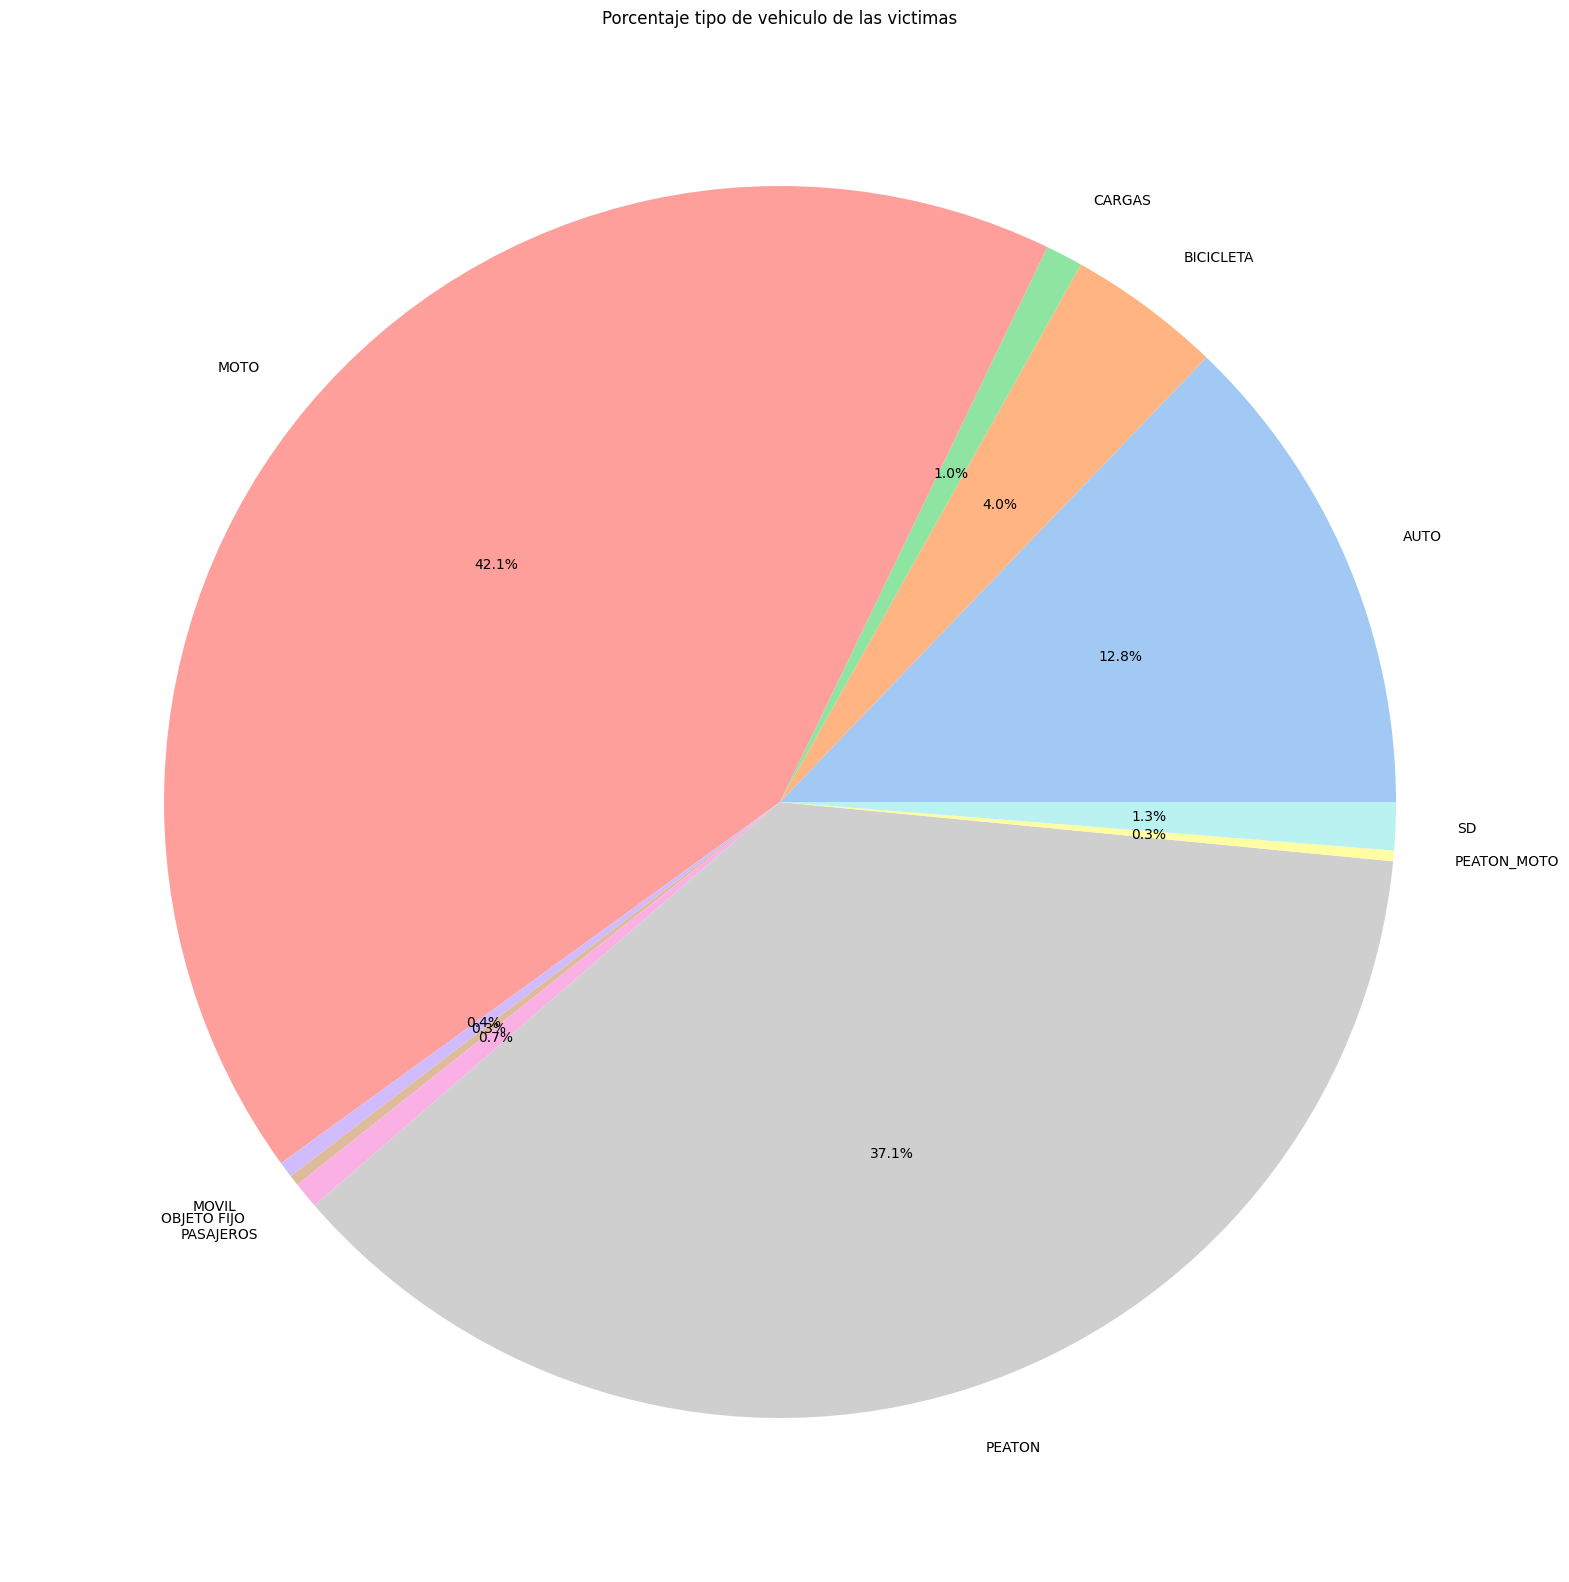

In [34]:
plt.figure(figsize=(20, 20))
plt.pie(tipo_victima['N_VICTIMAS'], labels=tipo_victima['VICTIMA'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Porcentaje tipo de vehiculo de las victimas')
plt.show()

Podemos notar que la gran mayoria de los vehiculos que son victimas de accidente son 'moto', 'auto' y 'peaton'. Siendo las motos las principales victimas.

Por ultimo veremos la evolucion de las victimas durante los diferentes meses y años:

In [35]:
evolucion_victima = homicidios_final.groupby(['AAAA'])['N_VICTIMAS'].sum().reset_index()

Vemos como quedo el nuevo dataframe:

In [36]:
evolucion_victima

,AAAA,N_VICTIMAS
0,2016,150
1,2017,160
2,2018,161
3,2019,106
4,2020,87
5,2021,97


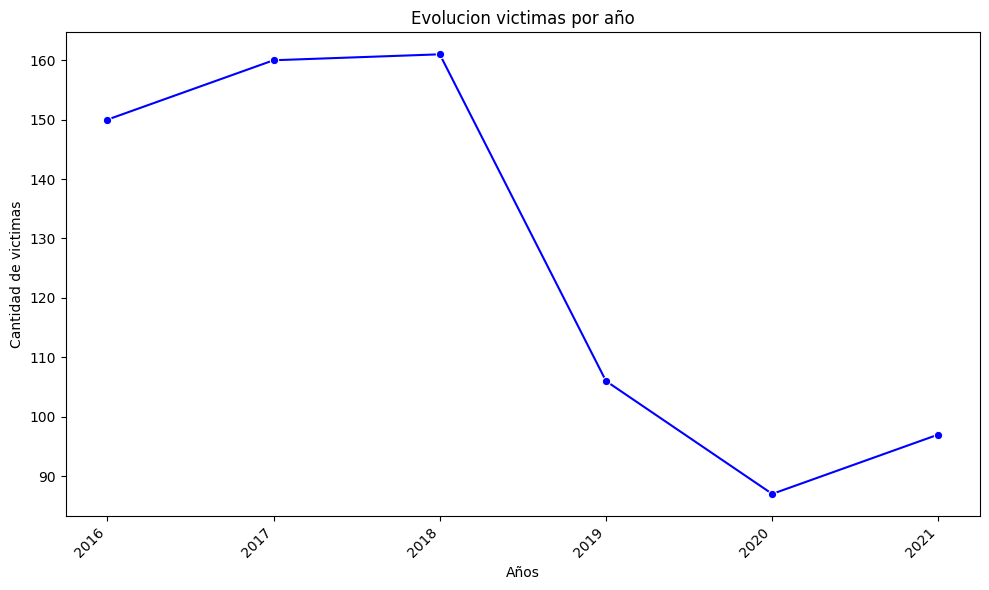

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AAAA', y='N_VICTIMAS', data=evolucion_victima, marker='o', linestyle='-', color='blue')
plt.xlabel('Años')
plt.ylabel('Cantidad de victimas')
plt.title('Evolucion victimas por año')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

En el grafico podemos ver una disminucion del numero de victimas a partir de 2018 hasta cituarse en cerca de las 100 victimas en 2021